### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('C:\\Users\\Izitra\\Downloads\\2008.csv')
df['UniqueCarrier'].value_counts()[0:10]

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**Задание 2:** Построить распределение причин отмены рейсов

In [5]:
df.keys()


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
a = df['CancellationCode'].value_counts()
a.index = ['Weather', 'Carrier', 'National Air System', 'Security']
a

Weather                54904
Carrier                54330
National Air System    28188
Security                  12
Name: CancellationCode, dtype: int64

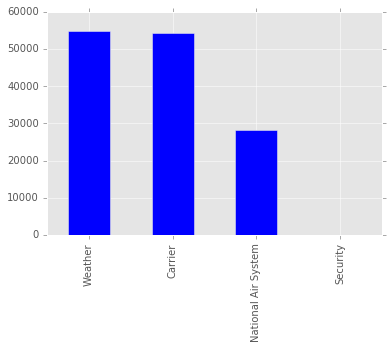

In [7]:
plt.style.use('ggplot')
%matplotlib inline
a.plot(kind='bar')

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [8]:
a = pd.DataFrame(df['Origin'] + df['Dest'], columns=['route']) 
popular = a['route'].value_counts().idxmax()
print(popular[:3] + '-' + popular[3:])

SFO-LAX


In [9]:
a = df.loc[df['Origin'] + df['Dest'] == popular]
a.describe()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13788,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,337,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,0,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,337,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,337,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,337,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,337,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,337,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

In [10]:
#Топ-5 рейсов по задержке по причине CarrierDelay
group1 = df[df['CarrierDelay'] > 0] [['FlightNum', 'UniqueCarrier']]
print('Топ-5 рейсов по задержке по причине CarrierDelay', '\n', group1['FlightNum'].value_counts()[0:5])
print('\n')

#Распределение авиакомпаний внутри этого топа
CD = df.loc[df['CarrierDelay'] > 0] [(df['FlightNum'] == 12) | (df['FlightNum'] == 15) | (df['FlightNum'] == 16) | (df['FlightNum'] == 44)
                                    | (df['FlightNum'] == 50)]
ResultCD = CD['UniqueCarrier'].value_counts()
print('Распределение авиакомпаний внутри этого топа', '\n', ResultCD)
print('\n')

#Топ-5 рейсов по задержке по причине WeatherDelay
group2 = df[df['WeatherDelay'] > 0] [['FlightNum', 'UniqueCarrier']]
print('Топ-5 рейсов по задержке по причине WeatherDelay', '\n', group2['FlightNum'].value_counts()[0:5])
print('\n')

#Распределение авиакомпаний внутри этого топа
WD = df.loc[df['WeatherDelay'] > 0] [(df['FlightNum'] == 539) | (df['FlightNum'] == 449) | (df['FlightNum'] == 648) | (df['FlightNum'] == 549)
                                    | (df['FlightNum'] == 653)]
ResultWD = WD['UniqueCarrier'].value_counts()
print('Распределение авиакомпаний внутри этого топа', '\n', ResultWD)
print('\n')

#Топ-5 рейсов по задержке по причине NASDelay
group3 = df[df['NASDelay'] > 0] [['FlightNum', 'UniqueCarrier']]
print('Топ-5 рейсов по задержке по причине NASDelay', '\n', group3['FlightNum'].value_counts()[0:5])
print('\n')

#Распределение авиакомпаний внутри этого топа
NASD = df.loc[df['NASDelay'] > 0] [(df['FlightNum'] == 75) | (df['FlightNum'] == 321) | (df['FlightNum'] == 701) | (df['FlightNum'] == 378)
                                    | (df['FlightNum'] == 15)]
ResultNASD = NASD['UniqueCarrier'].value_counts()
print('Распределение авиакомпаний внутри этого топа', '\n', ResultCD)
print('\n')

#Топ-5 рейсов по задержке по причине SecurityDelay
group4 = df[df['SecurityDelay'] > 0] [['FlightNum', 'UniqueCarrier']]
print('Топ-5 рейсов по задержке по причине SecurityDelay', '\n', group4['FlightNum'].value_counts()[0:5])
print('\n')

#Распределение авиакомпаний внутри этого топа
SD = df.loc[df['NASDelay'] > 0] [(df['FlightNum'] == 52) | (df['FlightNum'] == 47) | (df['FlightNum'] == 55) | (df['FlightNum'] == 167)
                                    | (df['FlightNum'] == 40)]
ResultSD = SD['UniqueCarrier'].value_counts()
print('Распределение авиакомпаний внутри этого топа', '\n', ResultSD)
print('\n')

#Топ-5 рейсов по задержке по причине LateAircraftDelay
group5 = df[df['LateAircraftDelay'] > 0] [['FlightNum', 'UniqueCarrier']]
print('Топ-5 рейсов по задержке по причине LateAircraftDelay', '\n', group5['FlightNum'].value_counts()[0:5])
print('\n')

#Распределение авиакомпаний внутри этого топа
LAD = df.loc[df['NASDelay'] > 0] [(df['FlightNum'] == 50) | (df['FlightNum'] == 52) | (df['FlightNum'] == 40) | (df['FlightNum'] == 44)
                                    | (df['FlightNum'] == 29)]
ResultLAD = LAD['UniqueCarrier'].value_counts()
print('Распределение авиакомпаний внутри этого топа', '\n', ResultLAD)
print('\n')

Топ-5 рейсов по задержке по причине CarrierDelay 
 12    633
15    590
16    553
44    550
50    550
Name: FlightNum, dtype: int64


Распределение авиакомпаний внутри этого топа 
 WN    940
HA    435
B6    366
US    220
CO    178
DL    171
XE    148
UA    134
AS    122
AA     84
FL     78
Name: UniqueCarrier, dtype: int64


Топ-5 рейсов по задержке по причине WeatherDelay 
 539    201
449    100
648     99
549     88
653     87
Name: FlightNum, dtype: int64


Распределение авиакомпаний внутри этого топа 
 CO    301
NW    166
WN     25
AA     24
UA     23
F9     16
FL      6
AS      5
DL      5
HA      2
US      2
Name: UniqueCarrier, dtype: int64


Топ-5 рейсов по задержке по причине NASDelay 
 75     838
321    796
701    777
378    757
15     755
Name: FlightNum, dtype: int64


Распределение авиакомпаний внутри этого топа 
 WN    940
HA    435
B6    366
US    220
CO    178
DL    171
XE    148
UA    134
AS    122
AA     84
FL     78
Name: UniqueCarrier, dtype: int64


Топ-5 рейсов по 

C:\Users\Izitra\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

In [11]:
Night = df[(df['DepTime'] > 0) & (df['DepTime'] <= 600)]['DepTime'].count()
Morning = df[(df['DepTime'] > 600) & (df['DepTime'] <= 1200)]['DepTime'].count()
Day = df[(df['DepTime'] > 1200) & (df['DepTime'] <= 1800)]['DepTime'].count()
Evening = df[(df['DepTime'] > 1800) & (df['DepTime'] <= 2400)]['DepTime'].count()
result = pd.Series([Night, Morning, Day, Evening], index=['Night', 'Morning', 'Day', 'Evening'])
result

Night       196385
Morning    2636943
Day        2554350
Evening    1485804
dtype: int64

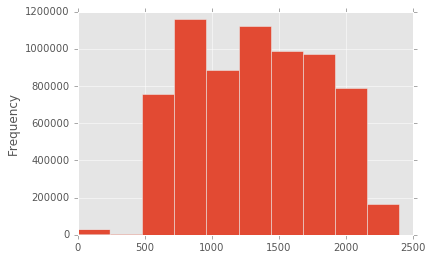

In [12]:
df['DepTime'].plot(kind='hist')

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

In [13]:
result = pd.DataFrame(df.groupby(['Month', 'DayofMonth']).size().reset_index(name = 'Q'))
result


,Month,DayofMonth,Q
0,1,1,19187
1,1,2,20954
2,1,3,20937
3,1,4,20929
4,1,5,18069
5,1,6,19897
6,1,7,20347
7,1,8,19604
8,1,9,19820
9,1,10,20305


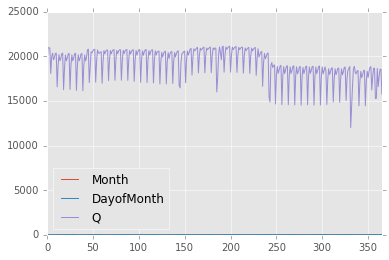

In [14]:
result.plot()

### 2. Продолжаем изучать Pandas

Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv('table13.csv') 
df2 = pd.read_csv('table14.csv')

states1 = pd.Series(df1['State'].unique())
states2 = pd.Series(df2['State'].unique())
result = states2.isin(states1).value_counts()[1]
result


48

**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [12]:
print(df1.keys(), '\n',  df2.keys())
df3 = df1.append(df2)
df3

Index(['State', 'Agency type', 'Agency name', 'Race', 'Religion',
       'Sexual orientation', 'Ethnicity', 'Disability', 'Gender',
       'Gender Identity', '1st quarter', '2nd quarter', '3rd quarter',
       '4th quarter', 'Population'],
      dtype='object') 
 Index(['State', 'Agency Type', 'Agency Name', 'Q1', 'Q2', 'Q3', 'Q4',
       'Population'],
      dtype='object')


,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,0,1,0,1,NaN,NaN,Florence,Cities,0,0,...,0,"39,481",NaN,NaN,NaN,NaN,2,0,0,Alabama
1,0,1,0,0,NaN,NaN,Hoover,Cities,0,0,...,0,"84,139",NaN,NaN,NaN,NaN,0,0,1,Alabama
2,1,0,1,0,NaN,NaN,Prattville,Cities,0,0,...,0,"35,154",NaN,NaN,NaN,NaN,2,0,0,Alabama
3,0,0,1,0,NaN,NaN,Tuscaloosa,Cities,0,0,...,0,"94,126",NaN,NaN,NaN,NaN,1,0,0,Alabama
4,2,3,3,0,NaN,NaN,Anchorage,Cities,0,0,...,0,"299,455",NaN,NaN,NaN,NaN,8,0,0,Alaska
5,1,0,0,NaN,NaN,NaN,Apache Junction,Cities,0,0,...,0,"36,626",NaN,NaN,NaN,NaN,1,0,0,Arizona
6,1,1,3,0,NaN,NaN,Avondale,Cities,0,1,...,0,"78,905",NaN,NaN,NaN,NaN,4,0,0,Arizona
7,0,1,0,0,NaN,NaN,Eagar,Cities,0,1,...,0,"5,034",NaN,NaN,NaN,NaN,0,0,0,Arizona
8,0,0,1,0,NaN,NaN,El Mirage,Cities,0,0,...,0,"32,837",NaN,NaN,NaN,NaN,1,0,0,Arizona
9,1,0,0,0,NaN,NaN,Gilbert,Cities,0,0,...,0,"225,232",NaN,NaN,NaN,NaN,1,0,0,Arizona


**Задание 3:** Изучите документации для методов `drop_dublicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [13]:
result = df3.dropna()
result

,1st quarter,2nd quarter,3rd quarter,4th quarter,Agency Name,Agency Type,Agency name,Agency type,Disability,Ethnicity,...,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State


In [14]:
df1.rename(columns={'Agency type':'Agency Type', 'Agency name':'Agency Name', '1st quarter':'Q1','2nd quarter':'Q2','3rd quarter':'Q3','4th quarter':'Q4'}, inplace=True)
df4 = df1.append(df2)
result1 = df4.dropna()
result1

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama
2,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0,Alabama
3,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0,Alabama
4,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0,Alaska
6,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0,Arizona
7,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0,Arizona
8,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0,Arizona
9,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0,Arizona
10,Glendale,Cities,0,1,0,0,"234,006",2,0,3,2,2,3,1,Arizona


**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [15]:
indexedresult1 = result1.set_index(['State', 'Agency Type'])
indexedresult1


Agency Name  \
State         Agency Type                                                       
Alabama       Cities                                                 Florence   
              Cities                                                   Hoover   
              Cities                                               Prattville   
              Cities                                               Tuscaloosa   
Alaska        Cities                                                Anchorage   
Arizona       Cities                                                 Avondale   
              Cities                                                    Eagar   
              Cities                                                El Mirage   
              Cities                                                  Gilbert   
              Cities                                                 Glendale   
              Cities                                                 Maricopa   
              Cities                                                     Mesa   
              Cities                                                 Prescott   
              Cities                                               Scottsdale   
              Cities                                                    Tempe   
              Cities                                                   Tucson   
              Cities                                                     Yuma   
              Universities and Colleges           Northern Arizona University   
              Universities and Colleges                 University of Arizona   
Arkansas      Cities                                              Bentonville   
              Cities                                               Berryville   
              Cities                                                    Cabot   
              Cities                                                  England   
              Cities                                            Fairfield Bay   
              Cities                                               Fort Smith   
              Cities                                                   Gurdon   
              Cities                                                   Marion   
              Cities                                        North Little Rock   
              Cities                                               Pine Bluff   
              Cities                                                   Rogers   
...                                                                       ...   
Washington    Universities and Colleges  Washington State University, Pullman   
              Universities and Colleges         Western Washington University   
West_Virginia Cities                                            Barboursville   
              Cities                                                  Beckley   
              Cities                                               Buckhannon   
              Cities                                               Charleston   
              Cities                                                   Dunbar   
              Cities                                                 Fairmont   
              Cities                                               Huntington   
              Cities                                              Martinsburg   
              Cities                                               Morgantown   
              Cities                                              Moundsville   
              Cities                                                 Oak Hill   
              Cities                                                Wellsburg   
Wisconsin     Cities                                                   Algoma   
              Cities                                                 Appleton   
              Cities                                               Burlington   
              Ci

**Задание 5:** В Pandas можно идерировать по DataFrame! Ищучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [21]:
new1 = indexedresult1.loc['West_Virginia' : 'Wyoming'].reset_index()
new1['Population'] = pd.to_numeric(new1['Population'].str.replace(',', ''))
new1[(new1['State'] == 'West_Virginia') & (new1['Agency Type'] == 'Cities')]['Population'].sum()
pd.DataFrame(new1.groupby(['State', 'Agency Type'])['Population'].sum())

Population
State         Agency Type                          
West_Virginia Cities                         222600
Wisconsin     Cities                        1302106
              Universities and Colleges        8668
Wyoming       Cities                          31884

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df5 = pd.read_csv('accord_sedan_training.csv')
x = df5['mileage'].values
y = df5['price'].values


new = np.ones(shape=(x.size, 2)) 
new[:, 1] = x
x = new
print(x, '\n', y)



[[  1.00000000e+00   6.76970000e+04]
 [  1.00000000e+00   7.37380000e+04]
 [  1.00000000e+00   8.03130000e+04]
 [  1.00000000e+00   8.60960000e+04]
 [  1.00000000e+00   7.96070000e+04]
 [  1.00000000e+00   9.69660000e+04]
 [  1.00000000e+00   1.26150000e+05]
 [  1.00000000e+00   1.19255000e+05]
 [  1.00000000e+00   7.35130000e+04]
 [  1.00000000e+00   5.06490000e+04]
 [  1.00000000e+00   9.00000000e+04]
 [  1.00000000e+00   1.14340000e+05]
 [  1.00000000e+00   7.52700000e+04]
 [  1.00000000e+00   5.46850000e+04]
 [  1.00000000e+00   6.84800000e+04]
 [  1.00000000e+00   1.07290000e+05]
 [  1.00000000e+00   3.91440000e+04]
 [  1.00000000e+00   4.28930000e+04]
 [  1.00000000e+00   1.03650000e+05]
 [  1.00000000e+00   5.91000000e+04]
 [  1.00000000e+00   9.64040000e+04]
 [  1.00000000e+00   5.94660000e+04]
 [  1.00000000e+00   8.96920000e+04]
 [  1.00000000e+00   9.14860000e+04]
 [  1.00000000e+00   9.02560000e+04]
 [  1.00000000e+00   8.59760000e+04]
 [  1.00000000e+00   1.03833000e+05]
 

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [22]:
# Здесь ваш код

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [23]:
# Здесь ваш код